In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기 및 저장 코드

In [20]:
df_active = pd.read_excel(r'C:\Users\yoon9\Desktop\3-2\Numble\넘블 챌린지 데이터\액티브 중소법인 재무보유.xlsx')
df_jaemu = pd.read_csv(r'C:\Users\yoon9\Desktop\3-2\Numble\넘블 챌린지 데이터\재무데이터.txt', delimiter = '\t',encoding = 'cp949')

In [21]:
import os

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [22]:
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF'  # for windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

# 휴폐업 ,액티브 중소법인 재무 보유 데이터 비교 EDA

In [23]:
# EDA 전 columns name 변경해주도록 하겠습니다.

df_active = df_active.rename(columns= {'BIZ_NO':'사업자등록번호', 'CMP_PFIX_NM':'기업접두명', 'CMP_NM1':'기업명', 'CMP_SFIX_NM':'기업접미명', 'CMP_ENM':'기업영문명', 'BZ_TYP':'업종','CMP_SCL':'기업규모', 'PBCO_GB':'공기업구분',
                           'PSN_CORP_GB':'개인법인구분', 'HDOF_BR_GB':'본점지점구분', 'FR_IVST_CORP_YN':'국외투자법인여부', 'VENT_YN':'벤처기업여부', 'LIST_CD':'상장코드', 'IND_CD_ORDR':'산업코드차수', 'IND_CD1':'산업코드1', 'IND_CD2':'산업코드2', 'IND_CD3':'산업코드3','PB_ORG_TYP':'공공기관유형', 'MDSCO_PRTC_YN':'중견기업보호여부', 'HDOF_CMP_CD':'본점기업코드', 'ESTB_DATE':'설립일자', 'ESTB_GB':'설립구분', 'LIST_DATE':'상장일자', 'MN_BIZ_CONT':'주요사업내용', 'NATN_NM':'국가명', 'HOMEPAGE_URL':'홈페이지URL', 'CEO_NM':'대표자명','EMP_CNT':'직원수'})

# ['BIZ_NO', 'CMP_PFIX_NM', 'CMP_NM1', 'CMP_SFIX_NM', 'CMP_ENM', 'BZ_TYP','CMP_SCL', 'PBCO_GB', 'PSN_CORP_GB', 'HDOF_BR_GB', 'FR_IVST_CORP_YN',
# 'VENT_YN', 'LIST_CD', 'IND_CD_ORDR', 'IND_CD1', 'IND_CD2', 'IND_CD3','PB_ORG_TYP', 'MDSCO_PRTC_YN', 'HDOF_CMP_CD', 'ESTB_DATE', 'ESTB_GB',
# 'LIST_DATE', 'MN_BIZ_CONT', 'NATN_NM', 'HOMEPAGE_URL', 'CEO_NM','EMP_CNT']
#
# '사업자등록번호','기업접두명', '기업명',/'기업접미명', /'기업영문명', /'업종',/ '기업규모',/ '공기업구분', '개인법인구분', '본점지점구분', '국외투자법인여부', '벤처기업여부', '상장코드', '산업코드차수', '산업코드1', '산업코드2', '산업코드3', '공공기관유형', '중견기업보호여부', '본점기업코드', '설립일자', '설립구분', '상장일자', '주요사업내용', '국가명', '홈페이지URL', '대표자명', '직원수'


필요 X : 기업규모 , 개인법인 구분 산업코드차수 (전부 같은 값이다)

### 업종

A : 신금(신용금고) -> 중소기업과 국민대중을 위한 자금을 융통하며 저축의 증대를 목적으로 하는 비영리적 조합조직에 의한 금융기관
B : 은행
C : 카드
F : 생보(생명보험) -> 보험사고 발생 객체가 피보험자의 생명 혹은 신체
I : 손보(손해보험) -> 보험사고 발생 객체가 피보험자의 재산
M : 제조
O : 기타금융
S : 증권
V : 창투(창업투자회사) -> 창의성과 사업성은 있으나 자금력이 부족한 창업자에게 투자 형태로 지원하는 벤처캐피털


In [24]:
df_down = pd.read_excel(r'C:\Users\yoon9\Desktop\3-2\Numble\넘블 챌린지 데이터\휴폐업 중소법인 재무보유.xlsx')
df_down = df_down.rename(
    columns={'BIZ_NO': '사업자등록번호', 'CMP_PFIX_NM': '기업접두명', 'CMP_NM': '기업명', 'CMP_SFIX_NM': '기업접미명', 'CMP_ENM': '기업영문명',
             'BZ_TYP': '업종', 'CMP_SCL': '기업규모', 'PBCO_GB': '공기업구분',
             'PSN_CORP_GB': '개인법인구분', 'HDOF_BR_GB': '본점지점구분', 'FR_IVST_CORP_YN': '국외투자법인여부', 'VENT_YN': '벤처기업여부',
             'LIST_CD': '상장코드', 'IND_CD_ORDR': '산업코드차수', 'IND_CD1': '산업코드1', 'IND_CD2': '산업코드2', 'IND_CD3': '산업코드3',
             'PB_ORG_TYP': '공공기관유형', 'MDSCO_PRTC_YN': '중견기업보호여부', 'HDOF_CMP_CD': '본점기업코드', 'ESTB_DATE': '설립일자',
             'ESTB_GB': '설립구분', 'LIST_DATE': '상장일자', 'MN_BIZ_CONT': '주요사업내용', 'NATN_NM': '국가명',
             'HOMEPAGE_URL': '홈페이지URL', 'CEO_NM': '대표자명', 'EMP_CNT': '직원수'})

그림 저장: 업종_countplot


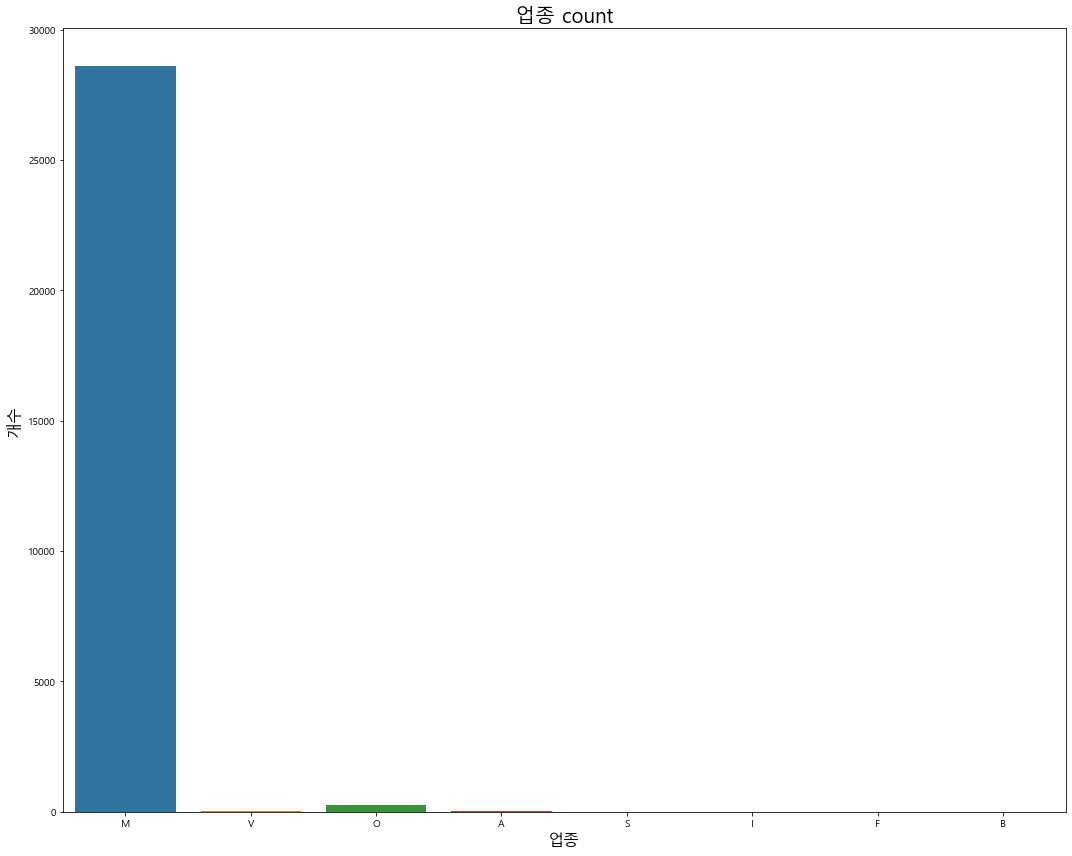

In [25]:
plt.figure(figsize=(15,12))
sns.countplot(data = df_active,x='업종')
plt.title('업종 count', fontsize=20)
plt.xlabel('업종', fontsize=16)
plt.ylabel('개수', fontsize=16)
save_fig("업종_countplot")
plt.show()

대략 3만개의 기업이 전부 M 인 제조업을 하는 것을 볼 수 있다.

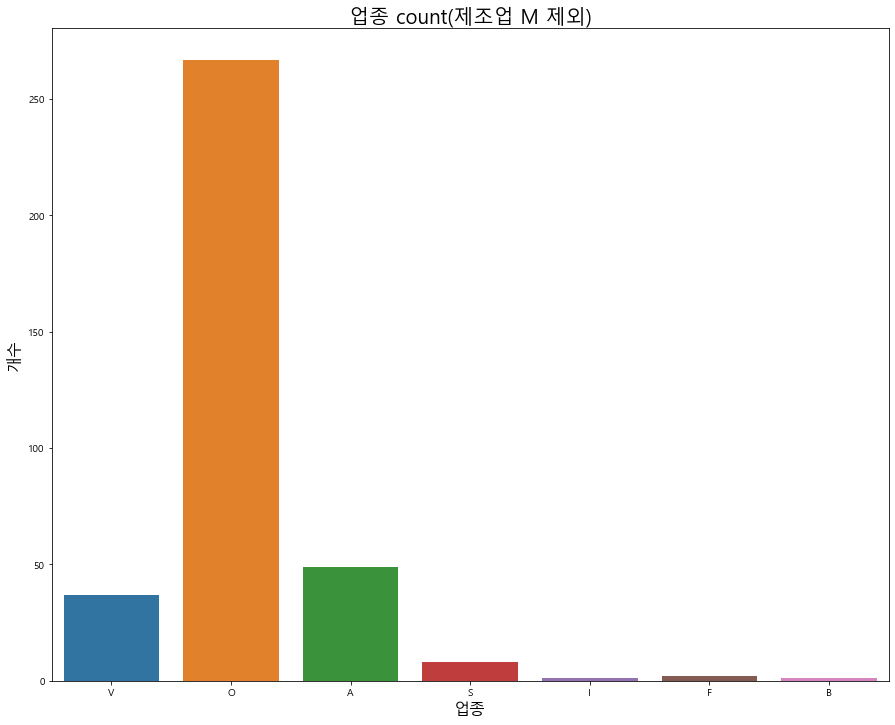

In [26]:
plt.figure(figsize=(15,12))
sns.countplot(data = df_active[df_active['업종'] != 'M'],x='업종')
plt.title('업종 count(제조업 M 제외)', fontsize=20)
plt.xlabel('업종', fontsize=16)
plt.ylabel('개수', fontsize=16)
#save_fig("업종_countplot_drop(M)")
plt.show()

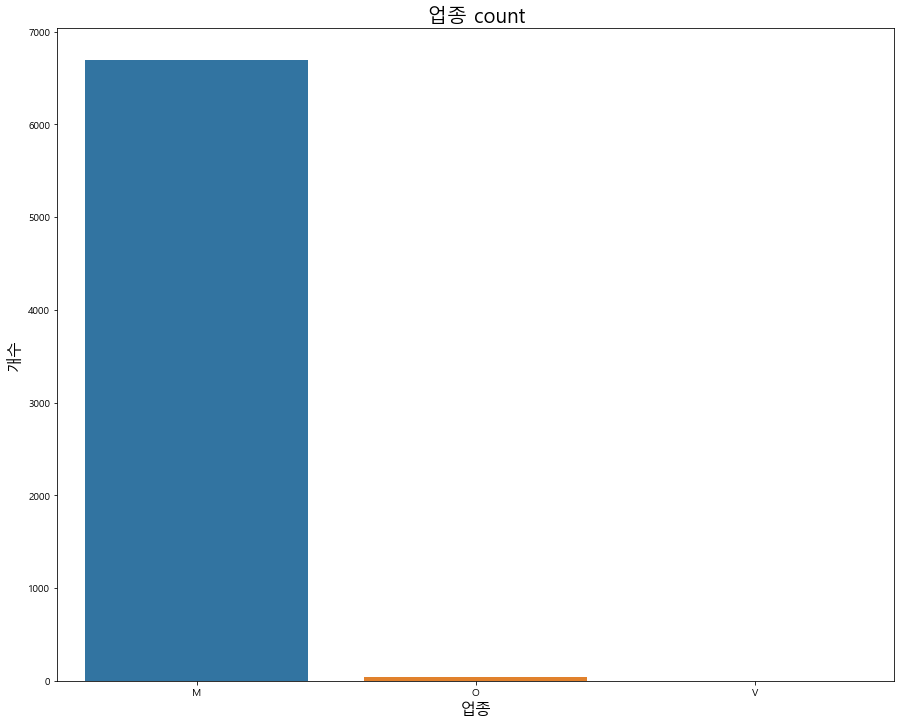

In [27]:
plt.figure(figsize=(15,12))
sns.countplot(data = df_down,x='업종')
plt.title('업종 count', fontsize=20)
plt.xlabel('업종', fontsize=16)
plt.ylabel('개수', fontsize=16)
#save_fig("업종_countplot")
plt.show()

액티브 데이터 와는 다르게 휴폐업의 데이터의 경우 거의 대부분 제조업이고 업종도 3가지 밖에 없다.

### 기업규모

전부 2여서 없애도 됌

In [28]:
df_active['기업규모'].value_counts()

# plt.figure(figsize=(15,12))
# sns.histplot(data = df_active,x='기업규모')
# plt.title('업종 count(제조업 M 제외)', fontsize=20)
# plt.xlabel('업종', fontsize=16)
# plt.ylabel('개수', fontsize=16)
# #save_fig("업종_countplot_drop(M)")
# plt.show()

2    28982
Name: 기업규모, dtype: int64

In [29]:
df_down['기업규모'].value_counts()

2    6739
Name: 기업규모, dtype: int64

마찬가지로 휴폐업 데이터도 전부 2이다.

### 공기업 구분

In [13]:
df_active['공기업구분'].value_counts() # 7개를 제외한 모든 기업이 사기업인듯

# 1 : 공기업
# 2 : 사기업

# 7개 기업 제외하고 모두 공기업이다.

2    28975
1        7
Name: 공기업구분, dtype: int64

In [32]:
df_down['공기업구분'].value_counts()

# 이와 대조적으로 휴폐업은 전부 2인 사기업이다. 공기업은 안망하겟짓..

2    6739
Name: 공기업구분, dtype: int64

### 본점지점구분

In [14]:
df_active['본점지점구분'].value_counts()

# 1: 본점
# 2: 분점


1    26070
2     2912
Name: 본점지점구분, dtype: int64

In [34]:
df_down['본점지점구분'].value_counts()

# 1: 본점
# 2: 분점


# 휴폐업에서도 역시 5200으로 본점이 더 많긴했다..

1    5274
2    1465
Name: 본점지점구분, dtype: int64

### 공기업구분, 본점지점구분, 국외투자법인여부, 벤처기업여부

In [15]:
print(df_active['공기업구분'].value_counts())
print('\n')
# 1 : 공기업
# 2 : 사기업

print(df_active['본점지점구분'].value_counts())
print('\n')
# 1: 본점
# 2: 분점

print(df_active['국외투자법인여부'].value_counts())
print('\n')

print(df_active['벤처기업여부'].value_counts())

# Y : Yes
# N : No

2    28975
1        7
Name: 공기업구분, dtype: int64


1    26070
2     2912
Name: 본점지점구분, dtype: int64


N    27347
Y     1635
Name: 국외투자법인여부, dtype: int64


N    26170
Y     2812
Name: 벤처기업여부, dtype: int64


### 상장코드

상장할때 받는 코드로 다 각기 다름
그리고 89개의 기업만 상장코드를 가지고 있어서 89개의 기업만 상장한듯

In [16]:
df_active['상장코드'].value_counts()

A120780    1
A012250    1
A102210    1
049130     1
A226350    1
          ..
A194510    1
A068420    1
A037340    1
A031920    1
A038160    1
Name: 상장코드, Length: 89, dtype: int64

### 산업코드

산업 코드에 따른 산업을 표준분류코드표를 확인하여 맵핑 필요

참고사이트 http://kssc.kostat.go.kr/ksscNew_web/kssc/common/ClassificationContent.do?gubun=1&strCategoryNameCode=001&categoryMenu=007&addGubun=no

In [17]:
code_list = ['산업코드1','산업코드2', '산업코드3']

for i in code_list:
    print(df_active[i].value_counts())
    print('/////////')

68129.0    1204
68112.0     777
68121.0     450
30391.0     441
68122.0     437
           ... 
10212.0       1
64130.0       1
91100.0       1
47840.0       1
20322.0       1
Name: 산업코드1, Length: 1360, dtype: int64
/////////
42310.0    44
42132.0    41
42320.0    30
42420.0    30
42209.0    26
           ..
52109.0     1
10302.0     1
22229.0     1
74000.0     1
10740.0     1
Name: 산업코드2, Length: 418, dtype: int64
/////////
42204.0    14
42320.0    14
42310.0    10
42134.0     7
75310.0     7
           ..
28122.0     1
74300.0     1
74100.0     1
49300.0     1
42136.0     1
Name: 산업코드3, Length: 133, dtype: int64
/////////


### 공공기관유형

In [18]:
df_active['공공기관유형'].value_counts()

#0 : 해당사항없음
#1 : 정부기구
#2 : 공기업/ 준정부기관
#3 : 지자체공단/ 공사

# 정부 기구는 없고 공기업이나 공단or공사가 조금 있는 것을 확인

0    28947
3       29
2        6
Name: 공공기관유형, dtype: int64

### 중견기업보호여부

In [19]:
df_active['중견기업보호여부'].value_counts()

# 대부분의 기업이 중견기업 보호를 받지 않지만
# 단 98개의 기업만이 보호를 받는다.

N    28884
Y       98
Name: 중견기업보호여부, dtype: int64

### 설립일자

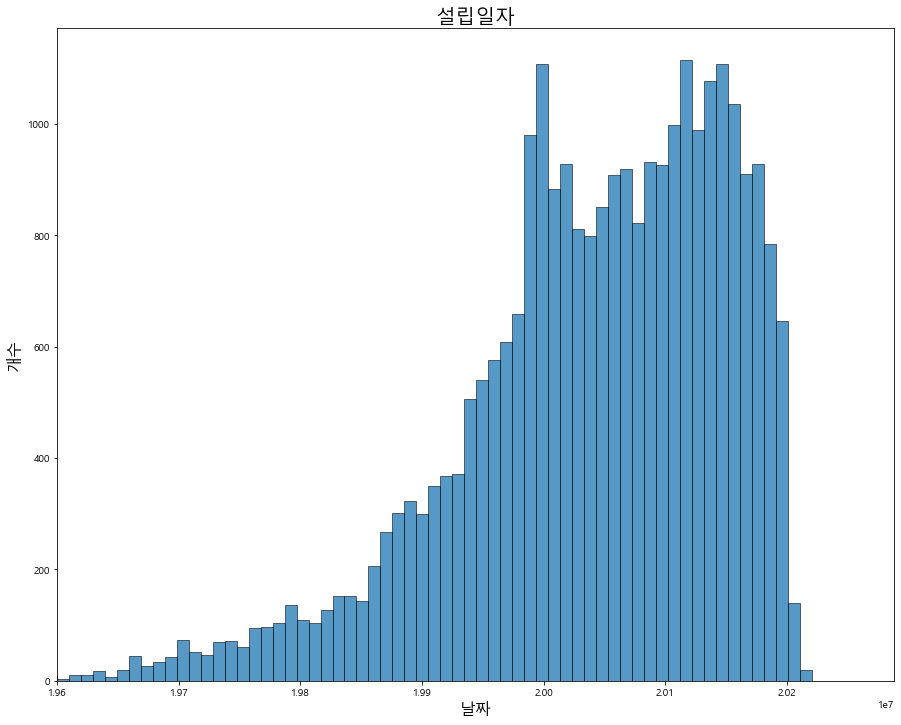

In [26]:
plt.figure(figsize=(15,12))
sns.histplot(data = df_active,x='설립일자')
plt.title('설립일자', fontsize=20)
plt.xlabel('날짜', fontsize=16)
plt.ylabel('개수', fontsize=16)
plt.xlim(19600000)
#save_fig("업종_countplot_drop(M)")
plt.show()

In [21]:
df_active['설립일자']

0        19660419.0
1        19910806.0
2        20011030.0
3        19990112.0
4        20000531.0
            ...    
28977    20191206.0
28978    20200402.0
28979    19900108.0
28980    20220615.0
28981    20211209.0
Name: 설립일자, Length: 28982, dtype: float64

### 설립일자

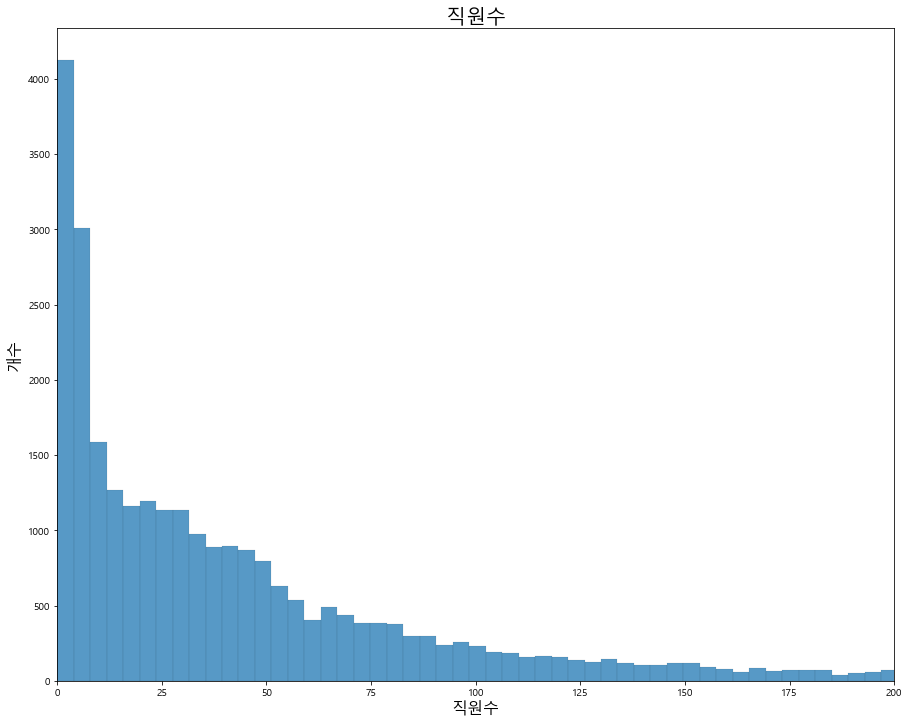

In [36]:
plt.figure(figsize=(15,12))
sns.histplot(data = df_active, x='직원수')
plt.title('직원수', fontsize=20)
plt.xlabel('직원수', fontsize=16)
plt.ylabel('개수', fontsize=16)
plt.xlim(0,200)
#save_fig("업종_countplot_drop(M)")
plt.show()

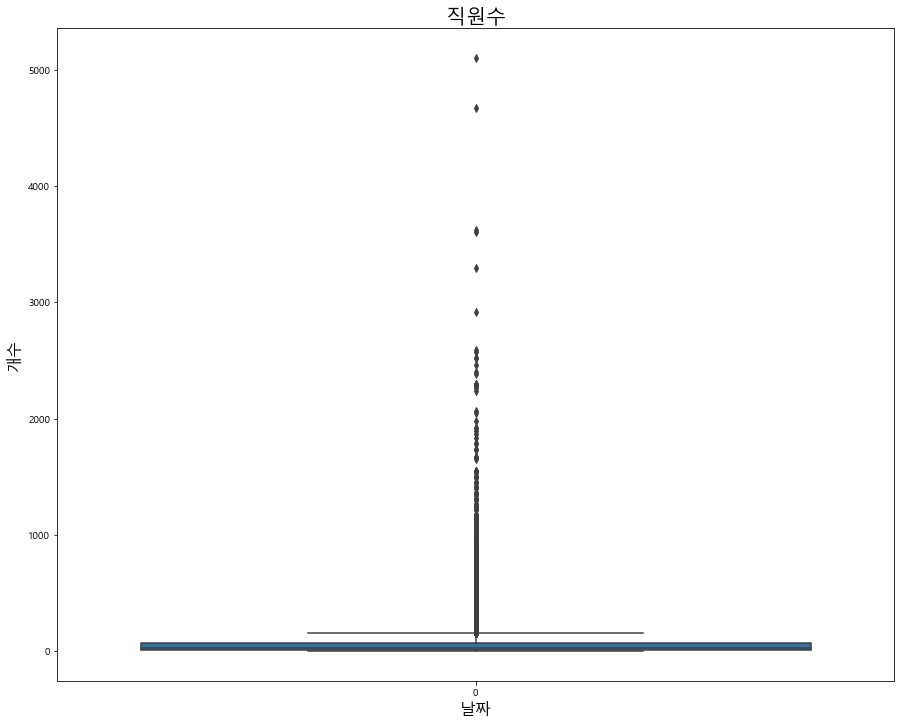

In [35]:
plt.figure(figsize=(15,12))
sns.boxplot(data = df_active['직원수'])
plt.title('직원수', fontsize=20)
plt.xlabel('날짜', fontsize=16)
plt.ylabel('개수', fontsize=16)
#save_fig("업종_countplot_drop(M)")
plt.show()

데이터에 이상치가 있는 듯

In [22]:
col_list = ['사업자등록번호', '기업접두명', '기업명', '기업접미명', '기업영문명', '업종', '공기업구분', '본점지점구분', '국외투자법인여부', '벤처기업여부', '상장코드', '산업코드1','산업코드2', '산업코드3' , '공공기관유형', '중견기업보호여부', '본점기업코드', '설립일자', '설립구분', '상장일자', '주요사업내용', '국가명', '홈페이지URL', '대표자명', '직원수']

In [23]:
for i in col_list:
    print(df_active[i].value_counts())
    print('/////////')

8398700544    1
1438102115    1
1448131234    1
1388159649    1
1208658794    1
             ..
1438117239    1
1018628789    1
3068118386    1
7128800625    1
1138165759    1
Name: 사업자등록번호, Length: 28982, dtype: int64
/////////
(주)    18458
(유)      121
(자)        1
Name: 기업접두명, dtype: int64
/////////
주택관리공단         10
소모에너지엔테크놀러지     9
신흥              7
한국체인모터          7
메인텍             6
               ..
유니슨에이치케이알       1
등주인스트루먼트        1
에스지세라           1
테마주택건설          1
에이텍아이오티         1
Name: 기업명, Length: 27359, dtype: int64
/////////
(주)    8916
(유)     253
Name: 기업접미명, dtype: int64
/////////
Korea Housing Management Co.,Ltd.         167
Samil Appraisal Corporation Co., Ltd.      11
Jinyoung Food Co.,Ltd.                      9
Dongbang Oil Co, Ltd                        9
Dai Sung Oil Co, Ltd                        9
                                         ... 
MUJEON CITY DEVELOPMENT CO.,LTD.            1
GLORIA EDUCATIONAL FOUNDATION CO.,LTD.      1
GEO-MYUNG DEVELOPMENT

In [24]:
col_list = ['업종', '공기업구분', '본점지점구분', '국외투자법인여부', '벤처기업여부', '상장코드', '산업코드1','산업코드2', '산업코드3', '공공기관유형', '중견기업보호여부', '본점기업코드', '설립일자', '설립구분', '상장일자', '주요사업내용', '국가명', '홈페이지URL', '대표자명', '직원수']


# 휴폐업 데이터 EDA

액티브 데이터 EDA 와 비교

In [6]:
df_down = pd.read_excel(r'C:\Users\yoon9\Desktop\3-2\Numble\넘블 챌린지 데이터\휴폐업 중소법인 재무보유.xlsx')

In [9]:
df_down = df_down.rename(columns= {'BIZ_NO':'사업자등록번호', 'CMP_PFIX_NM':'기업접두명', 'CMP_NM':'기업명', 'CMP_SFIX_NM':'기업접미명', 'CMP_ENM':'기업영문명', 'BZ_TYP':'업종','CMP_SCL':'기업규모', 'PBCO_GB':'공기업구분',
                           'PSN_CORP_GB':'개인법인구분', 'HDOF_BR_GB':'본점지점구분', 'FR_IVST_CORP_YN':'국외투자법인여부', 'VENT_YN':'벤처기업여부', 'LIST_CD':'상장코드', 'IND_CD_ORDR':'산업코드차수', 'IND_CD1':'산업코드1', 'IND_CD2':'산업코드2', 'IND_CD3':'산업코드3','PB_ORG_TYP':'공공기관유형', 'MDSCO_PRTC_YN':'중견기업보호여부', 'HDOF_CMP_CD':'본점기업코드', 'ESTB_DATE':'설립일자', 'ESTB_GB':'설립구분', 'LIST_DATE':'상장일자', 'MN_BIZ_CONT':'주요사업내용', 'NATN_NM':'국가명', 'HOMEPAGE_URL':'홈페이지URL', 'CEO_NM':'대표자명','EMP_CNT':'직원수'})

In [10]:
df_down

,사업자등록번호,기업접두명,기업명,기업접미명,기업영문명,업종,기업규모,공기업구분,개인법인구분,본점지점구분,...,중견기업보호여부,본점기업코드,설립일자,설립구분,상장일자,주요사업내용,국가명,홈페이지URL,대표자명,직원수
0,1268145633,(주),용진테크,NaN,"Yongjin Tech Co., Ltd.",M,2,2,1,1,...,N,NaN,20000529.0,1,NaN,자동차부품 제조판매업,NaN,www.yongjintech.com,안상동,40.0
1,1388101749,NaN,신구건설,(주),"SHINKU C0NSTRUCTION CO.,LTD.",M,2,2,1,1,...,N,NaN,19850110.0,1,NaN,건축자재 판매업,NaN,www.shinku.co.kr,소재필,13.0
2,1068179240,(주),석정미디어,NaN,sung jung,M,2,2,1,1,...,N,NaN,19990601.0,1,NaN,"토너, 잉크, 프린터 외 컴퓨터 관련 주변기기",NaN,NaN,이상호,1.0
3,2248114507,(주),새한실업,NaN,"SAEHAN INDUSTRY CO.,LTD.",M,2,2,1,1,...,N,NaN,19980522.0,1,NaN,금속 캔 및 기타 포장용기 제조업,NaN,NaN,김정남외 1명,6.0
4,1168132785,(주),석영엔터프라이즈,NaN,"Seokyoung Enterprise Co.,Ltd.",M,2,2,1,1,...,N,NaN,19930226.0,1,NaN,스마트트레이 외,NaN,www.systeel.co.kr,박성진,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,4808501629,NaN,게방식당팩토리,NaN,gebangsikdangfactory,M,2,2,1,2,...,N,8474403.0,20180126.0,1,NaN,간장게장(장류),NaN,https://gebangsikdang.modoo.at/,방건혁,NaN
6735,8018501578,(주),우진푸드중부지점,NaN,woojinfood,M,2,2,1,2,...,N,4033821.0,20200727.0,1,NaN,"돈가스, 탕수육, 꿔바로우",NaN,우진푸드.com,신남정,22.0
6736,4118523419,(주),윤월드푸드코리아다크써클브로스,NaN,"Youn World Food Korea Co., Ltd.",M,2,2,1,2,...,N,9189675.0,20190926.0,1,NaN,"한식, 중식",NaN,NaN,윤인수,0.0
6737,1738102533,(주),기린테크,NaN,"Girin Tech Co., Ltd.",M,2,2,1,1,...,N,NaN,20211025.0,1,NaN,1.인공지능(AI) 솔루션 구축 및 관련사업,NaN,NaN,임계현,NaN
